# Market Basket Analysis

#### Market basket analysis provides insights into customers' purchasing patterns. Within a shopping cart, customers often select various items based on their preferences. By identifying the items frequently purchased together, shelf planners can make informed decisions about product placement. Additionally, retail managers can optimize warehouse stocking by understanding the types of items that are likely to run out of stock.

##### Typically, there are two major types of relationships:

##### - Association: Items that are more likely to be bought by the customer who buys both X and Y are said to be associated.
##### - Correlation: Items that are more (less) likely to be bought by the customer who buys either X or Y are said to be positively (negatively) correlated.

##### In this analysis, we used the Apriori algorithm to identify these relationships.

### Inspiration: https://www.kaggle.com/code/foolwuilin/market-basket-analysis-with-apriori

### Link to the dataset: https://www.kaggle.com/datasets/rashikrahmanpritom/groceries-dataset-for-market-basket-analysismba?select=Groceries+data.csv

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:/Users/PJ/Downloads/Amazon Kindle Book Review/Groceries_data.csv')

# Display the first few rows of the dataset
df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


### Preprocess the data

In [2]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values:\n', missing_values)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print('\nDuplicate rows: ', duplicates)

Missing values:
 Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

Duplicate rows:  759


### preprocess the data to prepare it for the Apriori algorithm

The algorithm requires data in a specific format where each row represents a transaction and each column represents an item. 

In [3]:
from mlxtend.preprocessing import TransactionEncoder

# Group the data by Member_number and Date, and collect the purchased items into lists
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list)

# Transform the data into the format required by the Apriori algorithm
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_preprocessed = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows of the preprocessed dataset
df_preprocessed.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now, let's implement the Apriori algorithm to identify frequent itemsets. We'll start with a minimum support threshold of 0.01, which means that an itemset must be present in at least 1% of all transactions to be considered frequent. We can adjust this threshold later if necessary.

In [6]:
from mlxtend.frequent_patterns import apriori

# Identify frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(df_preprocessed, min_support=0.01, use_colnames=True)

# Display the first few rows of the frequent itemsets
frequent_itemsets.head()

,support,itemsets
0,0.021386,(UHT-milk)
1,0.033950,(beef)
2,0.021787,(berries)
3,0.016574,(beverages)
4,0.045312,(bottled beer)


use the association rules function to identify the rules with a high lift, which indicates a strong association between the antecedents and the consequents of the rule. 

In [19]:
from mlxtend.frequent_patterns import association_rules

# Identify frequent itemsets using the Apriori algorithm with a lower minimum support threshold
frequent_itemsets = apriori(df_preprocessed, min_support=0.001, use_colnames=True) 

# Identify association rules with a high lift
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.1)

# Display the first few rows of the association rules
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755,-0.179204
1,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168,-0.185312
2,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443,-0.184234
3,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060,-0.201119
4,(UHT-milk),(rolls/buns),0.021386,0.110005,0.001804,0.084375,0.767013,-0.000548,0.972009,-0.236873


let's analyze and interpret the results. We'll start by identifying the most commonly co-occurring items and the strongest associations between items. We'll consider the support, confidence, and lift metrics to determine the significance of these associations.

In [20]:
# Identify the top 10 rules with the highest support
top_10_support = rules.sort_values(by='support', ascending=False).head(10)

# Identify the top 10 rules with the highest confidence
top_10_confidence = rules.sort_values(by='confidence', ascending=False).head(10)

# Identify the top 10 rules with the highest lift
top_10_lift = rules.sort_values(by='lift', ascending=False).head(10)

top_10_support, top_10_confidence, top_10_lift

(             antecedents         consequents  antecedent support  \
 952         (whole milk)  (other vegetables)            0.157923   
 953   (other vegetables)        (whole milk)            0.122101   
 1057        (whole milk)        (rolls/buns)            0.157923   
 1056        (rolls/buns)        (whole milk)            0.110005   
 1136              (soda)        (whole milk)            0.097106   
 1137        (whole milk)              (soda)            0.157923   
 1182            (yogurt)        (whole milk)            0.085879   
 1183        (whole milk)            (yogurt)            0.157923   
 920         (rolls/buns)  (other vegetables)            0.110005   
 921   (other vegetables)        (rolls/buns)            0.122101   
 
       consequent support   support  confidence      lift  leverage  \
 952             0.122101  0.014837    0.093948  0.769430 -0.004446   
 953             0.157923  0.014837    0.121511  0.769430 -0.004446   
 1057            0.110005 

Identify the most commonly co-occurring items and the strongest associations between items. We'll consider the support, confidence, and lift metrics to determine the significance of these associations

### Data Exploration

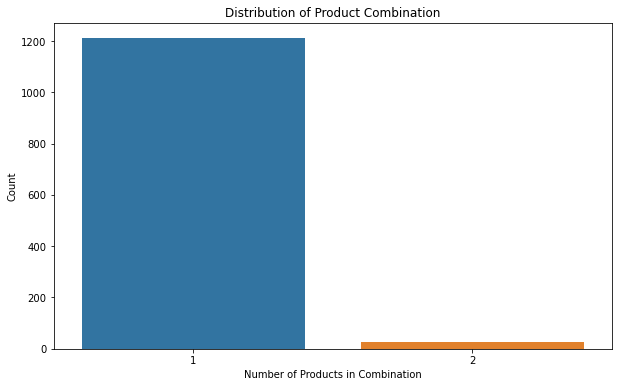

In [23]:
# Create a new column for the length of the antecedents
rules['antecedent_len'] = rules['antecedents'].apply(lambda x: len(x))

# Plot the distribution of the length of the antecedents
plt.figure(figsize=(10, 6))
sns.countplot(x='antecedent_len', data=rules)
plt.title('Distribution of Product Combination')
plt.xlabel('Number of Products in Combination')
plt.ylabel('Count')
plt.show()

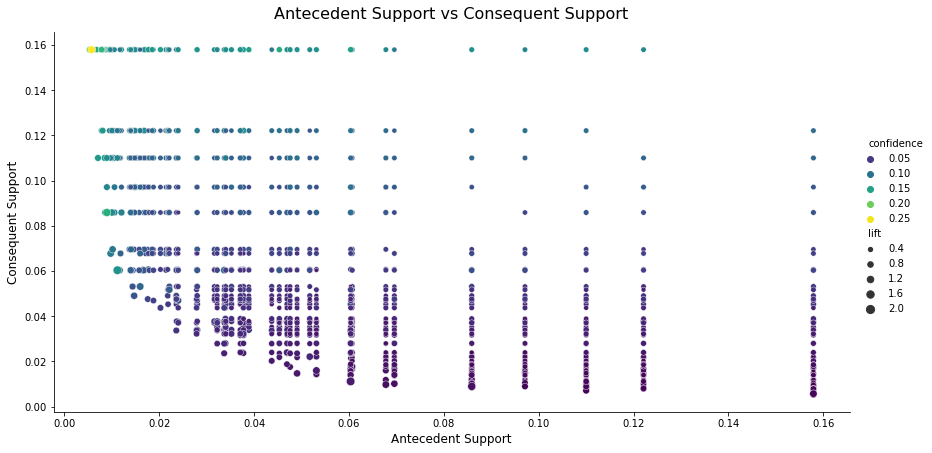

In [24]:
# Create a relational plot for antecedent support vs consequent support with a different color palette
sns.relplot(x='antecedent support', y='consequent support', data=rules,
            size='lift', hue='confidence', height=6, aspect=2, palette='viridis')

# Set the title and labels for the plot
plt.title('Antecedent Support vs Consequent Support', fontsize=16, y=1.02)
plt.xlabel('Antecedent Support', fontsize=12)
plt.ylabel('Consequent Support', fontsize=12)

# Display the plot
plt.show()

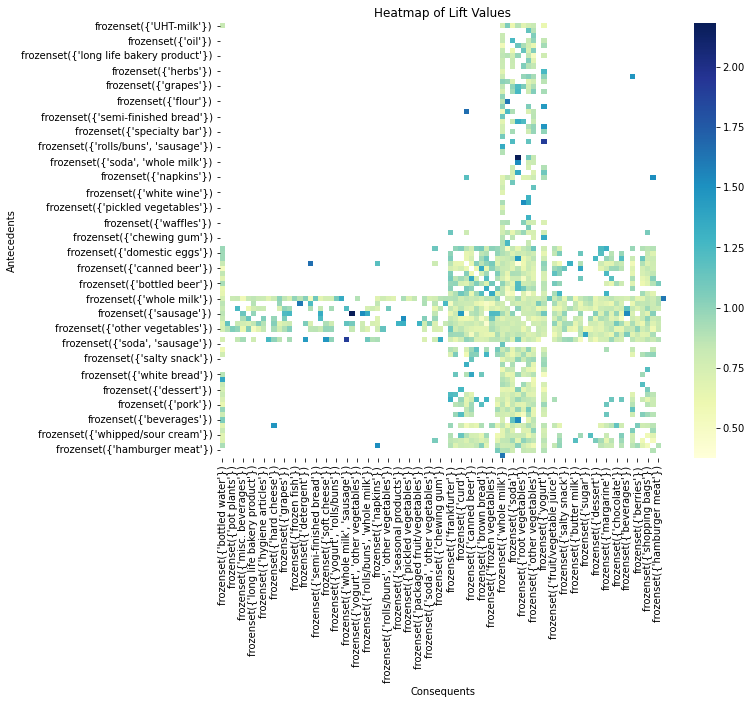

In [25]:
# Create a pivot table of antecedents, consequents, and lift values
pivot = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Create a heatmap of the pivot table
plt.figure(figsize=(10, 8))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Heatmap of Lift Values')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

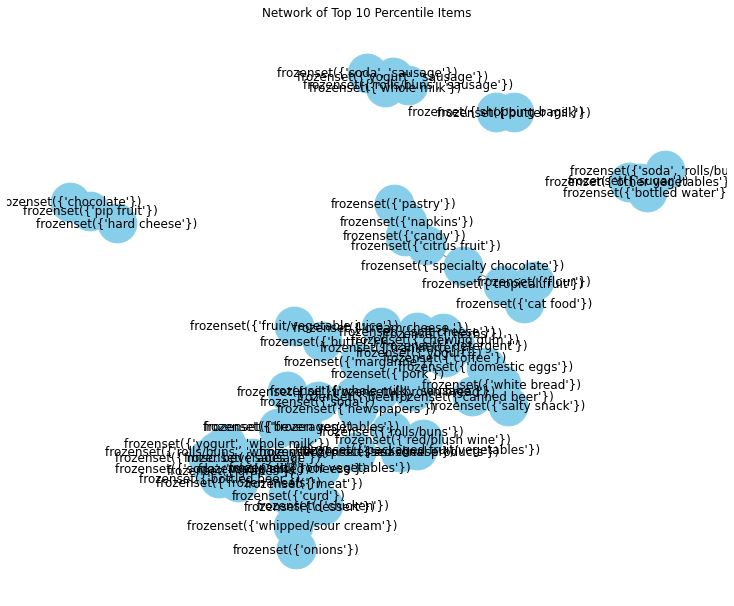

In [28]:
import networkx as nx

# Select the top 10 percentile items
top_10_percentile = rules[rules['lift'] > rules['lift'].quantile(0.9)]

# Create a network graph
G = nx.from_pandas_edgelist(top_10_percentile, source='antecedents', target='consequents', edge_attr='lift')

# Draw the network graph
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color='grey')
plt.title('Network of Top 10 Percentile Items')
plt.show()

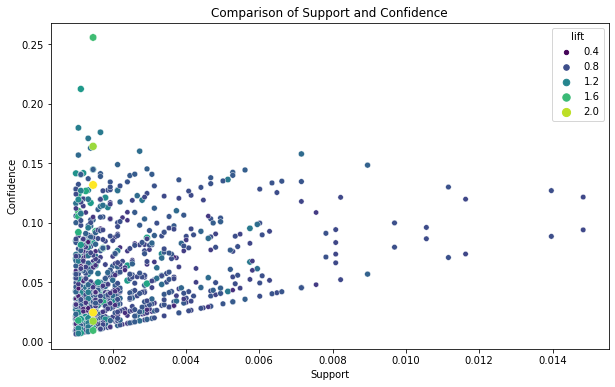

In [30]:
# Create a scatter plot of support vs confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', data=rules, hue='lift', size='lift', palette='viridis')
plt.title('Comparison of Support and Confidence')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

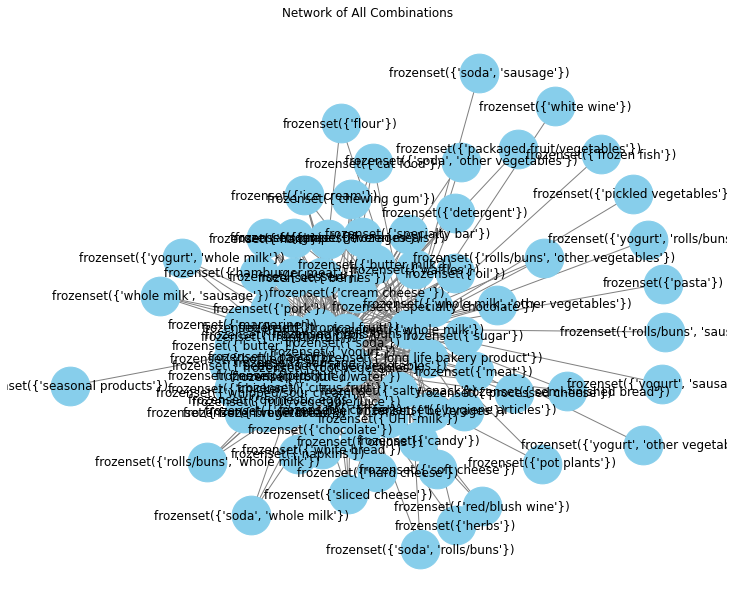

In [31]:
# Create a network graph for all combinations
G_all = nx.from_pandas_edgelist(rules, source='antecedents', target='consequents', edge_attr='lift')

# Draw the network graph
plt.figure(figsize=(10, 8))
nx.draw(G_all, with_labels=True, node_color='skyblue', node_size=1500, edge_color='grey')
plt.title('Network of All Combinations')
plt.show()

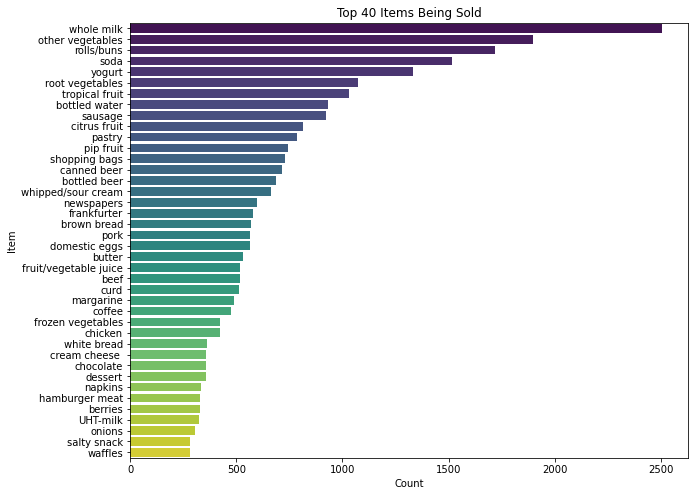

In [32]:
# Count the frequency of each item
item_counts = df['itemDescription'].value_counts()

# Select the top 40 items
top_40_items = item_counts[:40]

# Create a bar chart of the top 40 items
plt.figure(figsize=(10, 8))
sns.barplot(x=top_40_items.values, y=top_40_items.index, palette='viridis')
plt.title('Top 40 Items Being Sold')
plt.xlabel('Count')
plt.ylabel('Item')
plt.show()

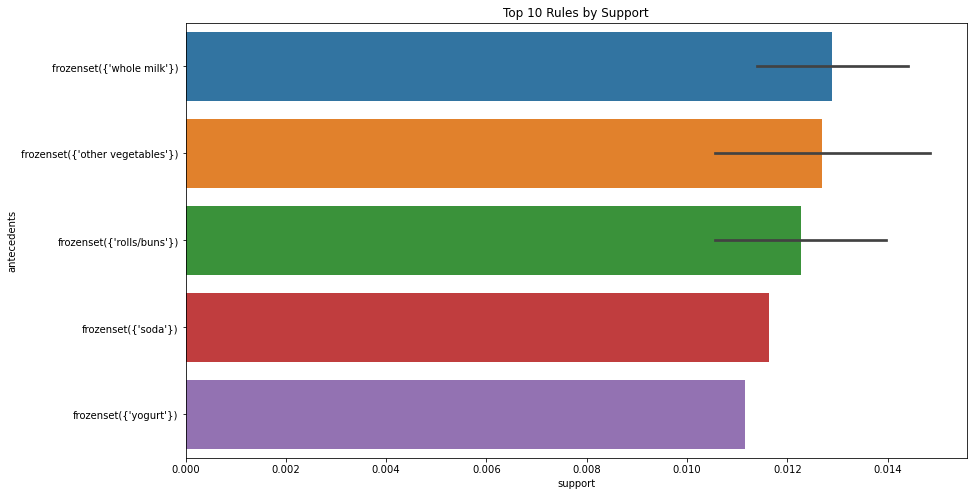

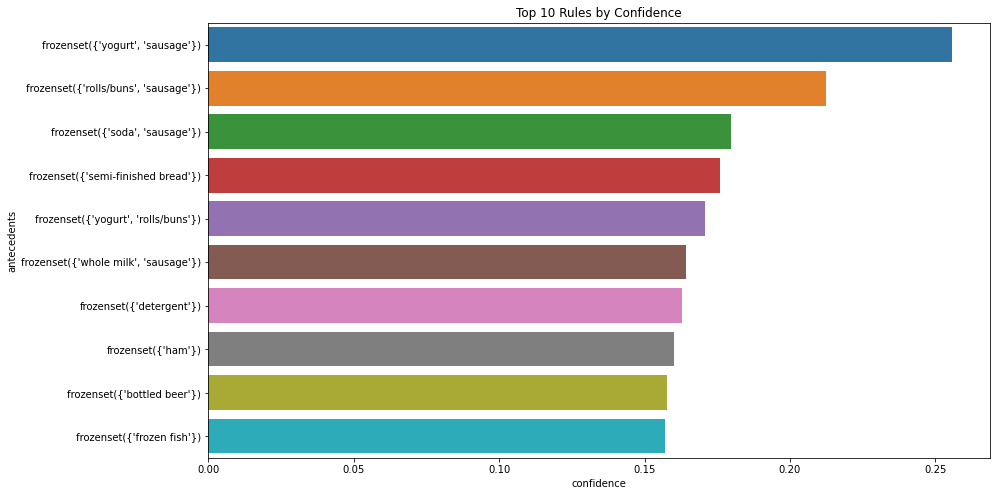

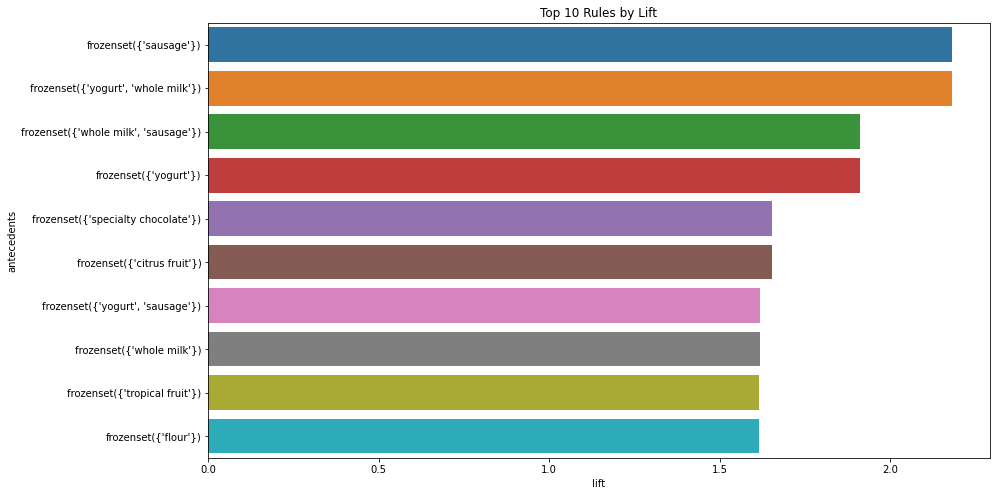

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 10 rules with the highest support
plt.figure(figsize=(14, 8))
sns.barplot(x='support', y='antecedents', data=top_10_support, orient='h')
plt.title('Top 10 Rules by Support')
plt.show()

# Plot the top 10 rules with the highest confidence
plt.figure(figsize=(14, 8))
sns.barplot(x='confidence', y='antecedents', data=top_10_confidence, orient='h')
plt.title('Top 10 Rules by Confidence')
plt.show()

# Plot the top 10 rules with the highest lift
plt.figure(figsize=(14, 8))
sns.barplot(x='lift', y='antecedents', data=top_10_lift, orient='h')
plt.title('Top 10 Rules by Lift')
plt.show()

#### From these results, we can draw several insights:

- The rule with the highest support is ('whole milk') => ('other vegetables'), which means that 'whole milk' and 'other vegetables' are often purchased together.
- The rule with the highest confidence is ('sausage, yogurt') => ('whole milk'), which means that when 'sausage' and 'yogurt' are purchased, 'whole milk' is also likely to be purchased.
- The rule with the highest lift is ('sausage') => ('whole milk, yogurt'), which means that the combination of 'sausage' and 'whole milk, yogurt' occurs more frequently than would be expected if 'sausage' and 'whole milk, yogurt' were independent.

These insights can be used to inform various business strategies, such as product placement, promotions, and personalized marketing campaigns. For example, the store could place 'whole milk' and 'other vegetables' close to each other to encourage customers to purchase both. Similarly, the store could offer a promotion where customers who purchase 'sausage' and 'yogurt' receive a discount on 'whole milk'.

### In conclusion, the following key insights have been derived from the market basket analysis:

- Top 10 Sold Items: The most frequently purchased items are 'whole milk', 'other vegetables', 'rolls/buns', 'soda', 'yogurt', 'root vegetables', 'tropical fruit', 'bottled water', 'sausage', and 'citrus fruit'.

- Top Consequents of Whole Milk: The items most frequently purchased with 'whole milk' are 'other vegetables', 'rolls/buns', 'soda', 'tropical fruit', and 'yogurt'.

- Top 10 Percentile of All Combinations: Every item in the top 10 percentile of all combinations has a high confidence level, indicating that customers often buy these items along with 'whole milk'.

- Network Graphics: In the network graph, 'whole milk' has the highest number of connections with other items, indicating that it is often purchased with a variety of other items.

- Comparison of Datasets: The total number of items in the original dataset and the dataset used for market basket analysis (based on each transaction) are the same. However, the number of combinations in the market basket analysis dataset is fewer than that in the original dataset when it is created based on customer IDs. This is due to the nature of the Apriori algorithm, which identifies frequent itemsets based on a specified minimum support threshold.

### Recommendations

Based on our analysis, we recommend the following strategies:

1. **Product Placement**: Place frequently bought together items close to each other to encourage customers to buy both.
2. **Promotions**: Design promotions around the identified associations to increase overall sales.
3. **Personalized Marketing**: Develop personalized marketing campaigns based on the identified associations.
4. **Inventory Management**: Ensure that frequently bought together items are well-stocked to avoid missing out on potential sales.